# Carregamento dos dados

In [220]:
import pandas as pd

# Definindo o caminho para o arquivo CSV com os dados das análises de aplicativos
file_path = '../Base/apps_reviews_validacao.xlsx - apps_reviews.csv'

# Carregando os dados do arquivo CSV em um DataFrame do pandas
# Usecols: Especifica as colunas a serem carregadas do arquivo
# 'reviewId', 'app_name', 'content', 'sentiment_polarity', 'sentiment' são as colunas selecionadas
# A última coluna nula é ignorada
comentarios = pd.read_csv(file_path, usecols=['reviewId', 'app_name', 'content', 'sentiment_polarity', 'sentiment'])

# Pré-processamento

In [221]:
import sys
import os

# Adicionando um diretório ao caminho de busca de módulos do Python
# os.path.abspath(os.path.join('..', 'lib')): Cria o caminho absoluto para o diretório 'lib' que está um nível acima do diretório atual
# sys.path.append(): Adiciona o diretório especificado ao caminho de busca de módulos, permitindo importar módulos localizados nesse diretório
sys.path.append(os.path.abspath(os.path.join('..', 'lib')))

<p style="color:green">Usar função criada para pré-processamento.</p> 

In [222]:
import pre_processamento as pp

# Chamando a função 'pre_processar_dataframe' do módulo 'pre_processamento'
# A função é usada para pré-processar a coluna 'content' do DataFrame 'comentarios'
# Executa todas operações de limpeza contidos em Base/Base_trabalho_final.ipynb
comentarios = pp.pre_processar_dataframe(comentarios, 'content')

In [223]:
# Confere que a função foi executada corretamente
comentarios.head()

,reviewId,app_name,content,sentiment_polarity,sentiment
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,positive,sadness
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,positive,sadness
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,positive,sadness
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,positive,sadness
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,negative,disgust


# Extração da features (representação de texto em formato vetorial)

<p style="color:green">A seguir, faremos a instanciação do método que fará a representação do texto usando o modelo BoW.</p> 

In [224]:
from sklearn.feature_extraction.text import CountVectorizer

# Criando uma instância do CountVectorizer
# O CountVectorizer converte uma coleção de documentos de texto em uma matriz de contagem de palavras (BoW)
# Cada entrada na matriz representa a contagem de uma palavra específica em um documento
vectorizer = CountVectorizer()

In [225]:
# Transformando o texto da coluna 'content' em uma matriz de contagem de palavras (Bag of Words)
# fit_transform: Ajusta o modelo aos dados de texto e transforma os dados em uma matriz de contagem de palavras
# BoW_matriz: Matriz onde cada linha representa um documento e cada coluna representa uma palavra, com valores de contagem
BoW_matriz = vectorizer.fit_transform(comentarios['content'])

# Convertendo a matriz de contagem de palavras em um DataFrame do pandas
# .toarray(): Converte a matriz esparsa em uma matriz densa (array)
# vectorizer.get_feature_names_out(): Obtém os nomes das características (palavras) para usar como colunas do DataFrame
# BOW_dataframe: DataFrame onde cada linha representa um documento e cada coluna representa uma palavra, com contagens de palavras
BOW_dataframe = pd.DataFrame(BoW_matriz.toarray(), columns=vectorizer.get_feature_names_out())

# Exibindo o DataFrame para verificar a transformação
BOW_dataframe

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Treinamento e teste

<p style="color:green">Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento. </p>

In [226]:
# Categoria a serem previstas
categorias = comentarios[['sentiment_polarity', 'sentiment']]

In [227]:
from sklearn.model_selection import train_test_split

# Dividindo o conjunto de dados em conjuntos de treino e teste
# test_size=0.2: 20% dos dados serão usados para teste, e o restante para treino.
X_train, X_test, y_train, y_test = train_test_split(BOW_dataframe, categorias, test_size=0.2)

# Extraindo as colunas 'sentiment_polarity' e 'sentiment' dos conjuntos de treino e teste
y_train_polarity = y_train['sentiment_polarity']
y_test_polarity = y_test['sentiment_polarity']
y_train_sentiment = y_train['sentiment']
y_test_sentiment = y_test['sentiment']


In [228]:
from sklearn.neighbors import KNeighborsClassifier

# Criando e treinando um classificador K-Nearest Neighbors (KNN) para prever a polaridade do sentimento
# n_neighbors=5: O número de vizinhos a considerar ao classificar um novo ponto
knn_polarity = KNeighborsClassifier(n_neighbors=5)
knn_polarity.fit(X_train, y_train_polarity)

# Fazendo previsões sobre o conjunto de teste para polaridade do sentimento
predicoes_polarity = knn_polarity.predict(X_test)

# Criando e treinando um classificador K-Nearest Neighbors (KNN) para prever o sentimento
# n_neighbors=5: O número de vizinhos a considerar ao classificar um novo ponto
knn_sentiment = KNeighborsClassifier(n_neighbors=5)
knn_sentiment.fit(X_train, y_train_sentiment)

# Fazendo previsões sobre o conjunto de teste para sentimento
predicoes_sentiment = knn_sentiment.predict(X_test)

In [229]:
from sklearn.metrics import classification_report

# Avaliando o desempenho do classificador KNN para a previsão do sentimento
print("\nAvaliação para 'sentiment':")
print(classification_report(y_test_sentiment, predicoes_sentiment))


Avaliação para 'sentiment':
              precision    recall  f1-score   support

       anger       0.35      0.62      0.45       154
     disgust       0.46      0.24      0.31       191
        fear       0.00      0.00      0.00        10
   happiness       0.21      0.46      0.29        81
     neutral       0.04      0.22      0.07         9
     sadness       0.83      0.06      0.12       157
    surprise       0.00      0.00      0.00         1

    accuracy                           0.31       603
   macro avg       0.27      0.23      0.18       603
weighted avg       0.48      0.31      0.28       603



c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

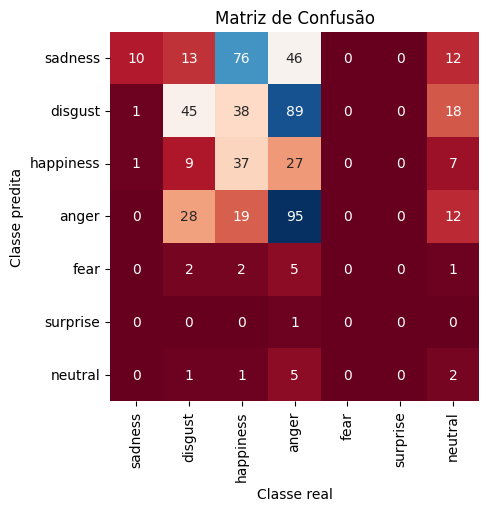

In [230]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo os rótulos únicos para o sentimento, que serão usados nos eixos da matriz de confusão
sentiment_labels = comentarios['sentiment'].unique()

# Calculando a matriz de confusão
# y_test_sentiment: Rótulos reais dos dados de teste para o sentimento
# predicoes_sentiment: Rótulos previstos pelo classificador para o sentimento
# labels: Rótulos das classes para garantir que a matriz de confusão tenha as mesmas ordens de classes
cm = confusion_matrix(y_test_sentiment, predicoes_sentiment, labels=sentiment_labels)

# Criando um gráfico da matriz de confusão usando seaborn
# annot=True: Adiciona anotações com os valores das células
# fmt='d': Formata os valores das anotações como inteiros
# cmap='RdBu': Define o mapa de cores para o gráfico
# cbar=False: Remove a barra de cores
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels,
            yticklabels=sentiment_labels)

plt.xlabel("Classe real")    # Rótulo do eixo x
plt.ylabel("Classe predita") # Rótulo do eixo y
plt.title("Matriz de Confusão") # Título do gráfico
plt.show() # Exibindo o gráfico

In [231]:
from sklearn.metrics import classification_report

# Avaliando o desempenho do classificador KNN para a previsão da polaridade
print("\nAvaliação para 'polarity':")
print(classification_report(y_test_polarity, predicoes_polarity))


Avaliação para 'polarity':
              precision    recall  f1-score   support

    negative       0.72      0.78      0.74       355
     neutral       0.03      0.11      0.05         9
    positive       0.66      0.52      0.59       239

    accuracy                           0.67       603
   macro avg       0.47      0.47      0.46       603
weighted avg       0.68      0.67      0.67       603



<p style="color:green">Vamos montar a matriz de confusão usando um mapa de valor da biblioteca Seaborn</p>

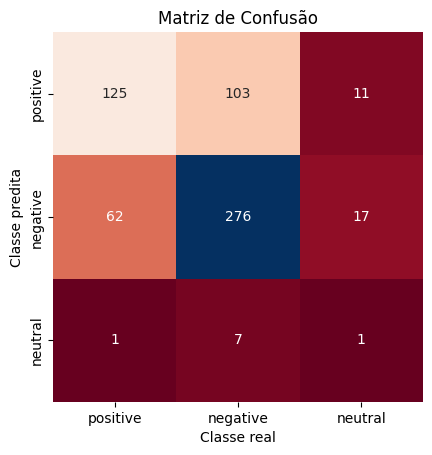

In [232]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo os rótulos únicos para a polaridade do sentimento, que serão usados nos eixos da matriz de confusão
sentiment_labels_pol = comentarios['sentiment_polarity'].unique()

# Calculando a matriz de confusão para avaliar a performance do classificador KNN para a polaridade do sentimento
# y_test_polarity: Rótulos reais dos dados de teste para a polaridade do sentimento
# predicoes_polarity: Rótulos previstos pelo classificador KNN para a polaridade do sentimento
# labels: Rótulos das classes para garantir que a matriz de confusão tenha as mesmas ordens de classes
cm = confusion_matrix(y_test_polarity, predicoes_polarity, labels=sentiment_labels_pol)

# Criando um gráfico da matriz de confusão usando seaborn
# annot=True: Adiciona anotações com os valores das células
# fmt='d': Formata os valores das anotações como inteiros
# cmap='RdBu': Define o mapa de cores para o gráfico
# cbar=False: Remove a barra de cores
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels_pol,
            yticklabels=sentiment_labels_pol)

plt.xlabel("Classe real")    # Rótulo do eixo x
plt.ylabel("Classe predita") # Rótulo do eixo y
plt.title("Matriz de Confusão") # Título do gráfico
plt.show() # Exibindo o gráfico